## 1. Frontal face detection (Dlib, HOG-based)

You can call `face_detector.py` from 
1. terminal
```
python3 face_detector.py obama.jpg
```
2. jupyter notebook
```
%run -i face_detector.py obama.jpg
```

Below is a modified code containing essential steps.

In [1]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

## function for plotting face detection results
def plotImgRect(ax, img, rects, scores=None, color="green"):
    ''' 
    plot image and detected faces (rects)
    ax: axis of a pyplot (ax = fig.add_subplot(111, aspect='equal')
    '''

    ax.imshow(img)

    for i, d in enumerate(rects):
        if scores is not None:
            print("Detection {}, score: {}, face_type:{}".format(d, scores[i], idx[i]))    

        # plot rect
        ax.add_patch(
            patches.Rectangle(
                (d.left(), d.top()),   # (x,y)
                d.width(),          # width
                d.height(),          # height
                fill=False,      # remove background
                edgecolor=color, linewidth=3
            )
        )

Number of faces detected: 5
Detection 0: Left: 796 Top: 546 Right: 903 Bottom: 653
Detection 1: Left: 713 Top: 126 Right: 802 Bottom: 216
Detection 2: Left: 205 Top: 126 Right: 295 Bottom: 216
Detection 3: Left: 444 Top: 285 Right: 534 Bottom: 375
Detection 4: Left: 115 Top: 390 Right: 223 Bottom: 498
(1425, 1000, 3)


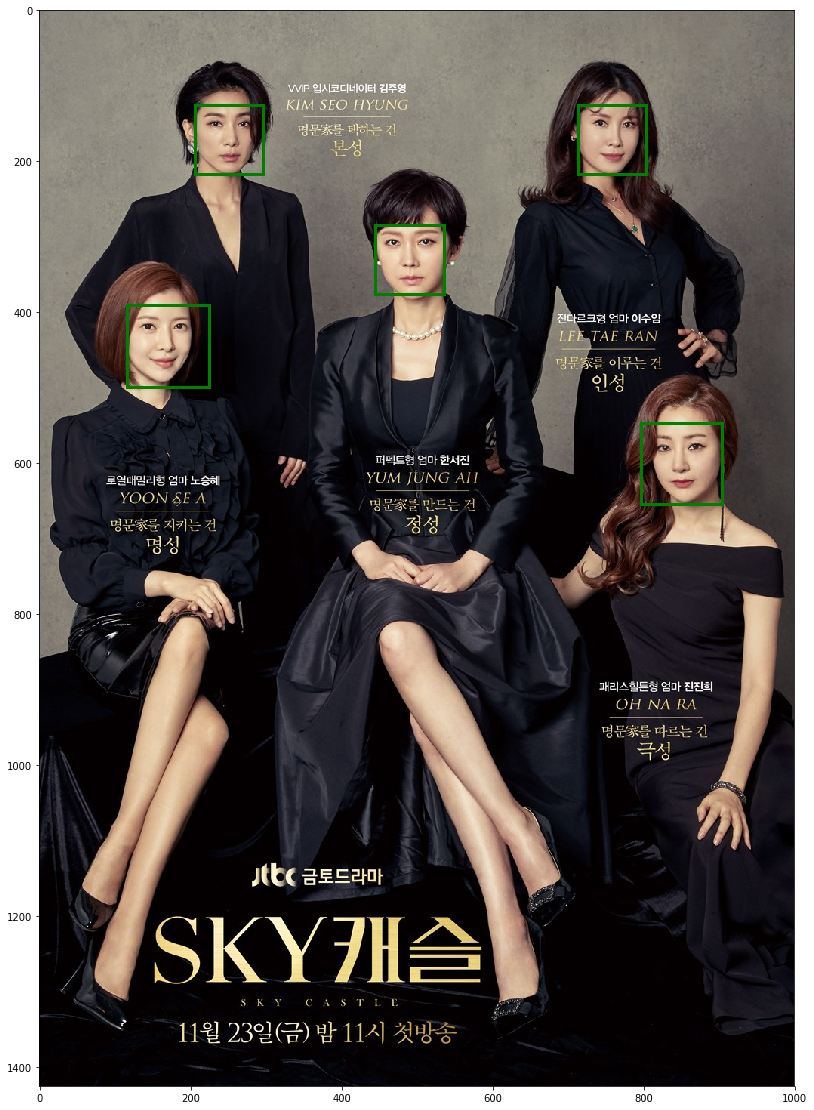

In [19]:
# copied core code from face_detector.py

import dlib
from skimage import io

detector = dlib.get_frontal_face_detector()

# load an image
#filename = "obama.jpg"
filename = "sky.jpg"
img = io.imread(filename)

# detect face
# The 1 in the second argument indicates that we should upsample the image 1 time.  
# This will make everything bigger and allow us to detect more faces.
dets = detector(img, 1)

num_faces = len(dets)
print("Number of faces detected: {}".format(num_faces))
for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
          i, d.left(), d.top(), d.right(), d.bottom()))

# plot results
print(img.shape)
ppi=72
fig1 = plt.figure(figsize=(img.shape[1]/ppi, img.shape[0]/ppi))
ax1 = fig1.add_subplot(111, aspect='equal')

plotImgRect(ax1, img, dets)
fig1.savefig('detection_results.png', dpi=90, bbox_inches='tight')



### plot faces only in gray

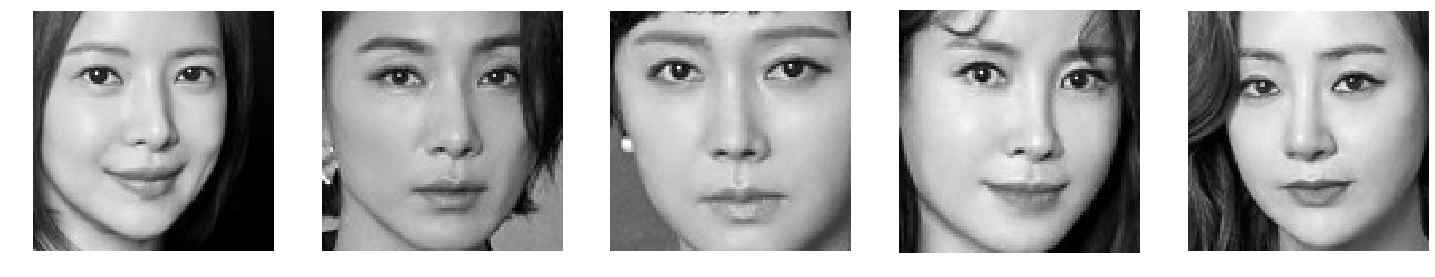

In [65]:
def sort_by_left(rects):
    #print(rects)
    #len(rects)
    rects = np.array(rects)
    #print(rects)
    #print(rects.shape)
    return rects[rects[:,0].argsort(),:]

# get list of rect
rects = list()
for i, d in enumerate(dets):
    rects.append((d.left(), d.top(), d.right(), d.bottom()))

# sort detected rect according to left()
rects = sort_by_left(rects)
    
# plot faces    
plt.figure(figsize=(num_faces*5,5))
for i, r in enumerate(rects):
    face=img[r[1]:r[3], r[0]:r[2]]
    face_gray=np.mean(face,axis=2)
    
    plt.subplot(1,num_faces,i+1)
    #plt.imshow(face)
    plt.imshow(face_gray)
    
    plt.axis('off')

plt.savefig('detected_faces.png', bbox_inches='tight')    

## 2. Multi-view face detection (Dlib, CNN-based)

You can call `cnn_face_detector.py` from 
1. terminal
```
python3 cnn_face_detector.py mmod_human_face_detector.dat obama.jpg
```
2. jupyter notebook
```
%run -i cnn_face_detector.py mmod_human_face_detector.dat obama.jpg
```

Below is a modified code containing essential steps.

Number of faces detected: 1
Detection 0: Left: 156 Top: 60 Right: 274 Bottom: 178
(549, 440, 3)


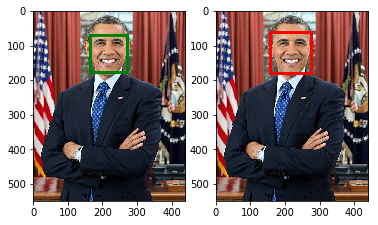

In [34]:
import dlib
from skimage import io

# CNN-based multi-view face detector
# You can get the model from file from http://dlib.net/files/mmod_human_face_detector.dat.bz2"
cnn_face_detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

dets_cnn = cnn_face_detector(img, 1)

print("Number of faces detected: {}".format(len(dets_cnn)))
for i, d in enumerate(dets_cnn):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
          i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom()))

# output is slightly different for CNN-based detector (it has rect and confidence)
# choose rect only
rects_cnn = dlib.rectangles()
rects_cnn.extend([d.rect for d in dets_cnn])    
    
# plot results (compare HOG and CNN)    
print(img.shape)
fig1 = plt.figure()    
ax1 = fig1.add_subplot(121, aspect='equal')
plotImgRect(ax1, img, dets, color="green")
ax1 = fig1.add_subplot(122, aspect='equal')
plotImgRect(ax1, img, rects_cnn, color="red")
fig1.savefig('detected_faces_HOG_vs_CNN.png', dpi=90, bbox_inches='tight')